In [204]:
# Import internal library
# 1 
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load rankings data
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
# load rankings data
steel = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
print(wood.head())
print(steel.head())


   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     

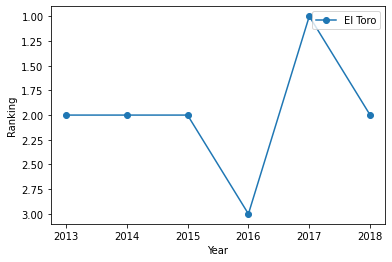

In [270]:
# 2Write a function that will plot the ranking of a given roller coaster over time as a line. 
# Your function should take a roller coaster’s name and a ranking DataFrame as arguments. 
# Make sure to include informative labels that describe your visualization.
El_Toro = wood[wood.Name == 'El Toro']
# Create a function to plot rankings over time for 1 roller coaster
def plot_ranking(name, park):
    ax = plt.subplot()
    
    plt.plot(wood['Year of Rank'][(wood.Name == name) & (wood.Park == park)], wood['Rank'][(wood.Name == name) & (wood.Park == park)], marker = 'o')
    plt.ylabel('Ranking')
    plt.xlabel('Year')
    plt.legend([name], loc = 1)
    ax.invert_yaxis()
    plt.show()

plot_ranking('El Toro','Six Flags Great Adventure')


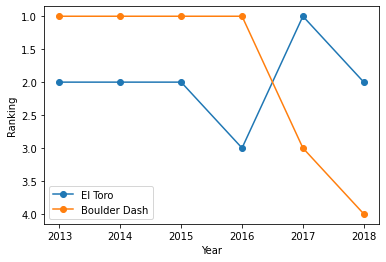

In [269]:
# 3
# Create a plot of El Toro ranking over time
El_Toro = wood[(wood.Name == 'El Toro')|(wood.Name == 'Boulder Dash')]
# Create a plot of El Toro and Boulder dash hurricanes
def plot_ranking(name1, name2, park1, park2):
    ax = plt.subplot()
    ax.invert_yaxis()
    line1 = wood[(wood.Name == name1) & (wood.Park == park1)]
    line2 = wood[(wood.Name == name2) & (wood.Park == park2)]
    
    plt.plot(line1['Year of Rank'], line1['Rank'], marker = 'o')
    plt.plot(line2['Year of Rank'], line2['Rank'], marker = 'o')
    plt.ylabel('Ranking')
    plt.xlabel('Year')
    plt.legend([name1, name2], loc =3)
    plt.show()

plot_ranking('El Toro', 'Boulder Dash', 'Six Flags Great Adventure', 'Lake Compounce')

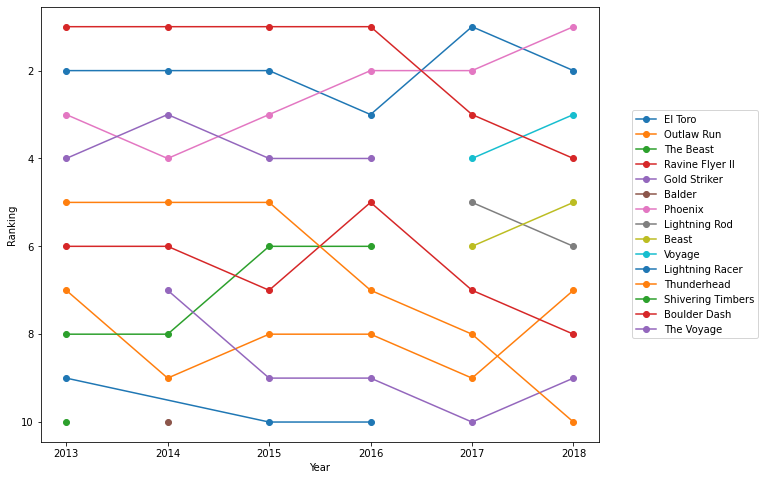

In [200]:
# 4
# Create a function to plot top n rankings over time
def plot_ranking(n):
    plt.figure(figsize=(10,8))
    ax = plt.subplot()
    ax.invert_yaxis()
    legend = []   
    df = wood[wood['Rank'] <= n]
    for name in set(df.Name):
        line = df[df['Name'] == name]
        plt.plot(line['Year of Rank'], line['Rank'], label=name, marker ='o' )
# Create a plot of top n rankings over time
plot_ranking(10)
plt.ylabel('Ranking')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()

In [121]:
# 5
# load roller coaster data
df = pd.read_csv('roller_coasters.csv')
df = df.dropna()
print(df.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


In [277]:
# 6
# Create a function to plot histogram of column values
def plot_hist(df, col, ax):
    ax.hist(df[col], label = col, bins = 20)
    ax.set_title(col+' of Roller Coaster')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
# Create a function to plot histogram of height values
def plot_hist_height(df, col, ax):
    heights = df[df[col] <= 200]
    ax.hist(df[col], label = col, bins = 20)
    ax.set_title(col+' of Roller Coaster')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

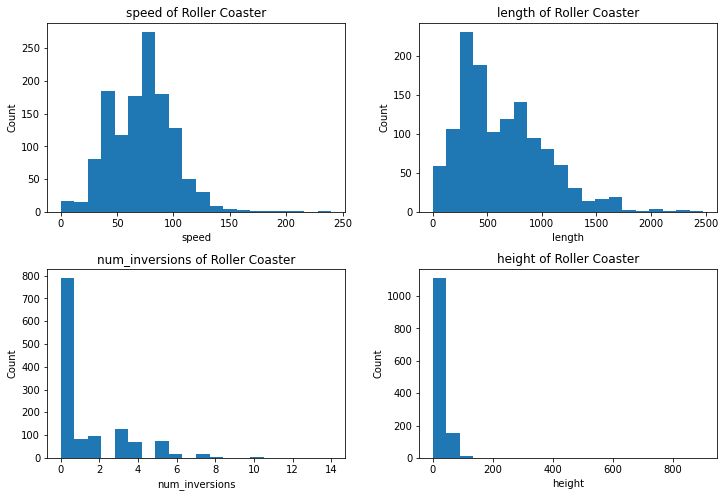

In [278]:
# Create histogram of roller coaster speed
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.25, hspace=0.3)

plot_hist(df,'speed', axs[0, 0])
# Create histogram of roller coaster length
plot_hist(df, 'length',axs[0, 1])
# Create histogram of roller coaster number of inversions
plot_hist(df, 'num_inversions', axs[1, 0])
# Create a histogram of roller coaster height
plot_hist_height(df, 'height', axs[1, 1])
plt.show()

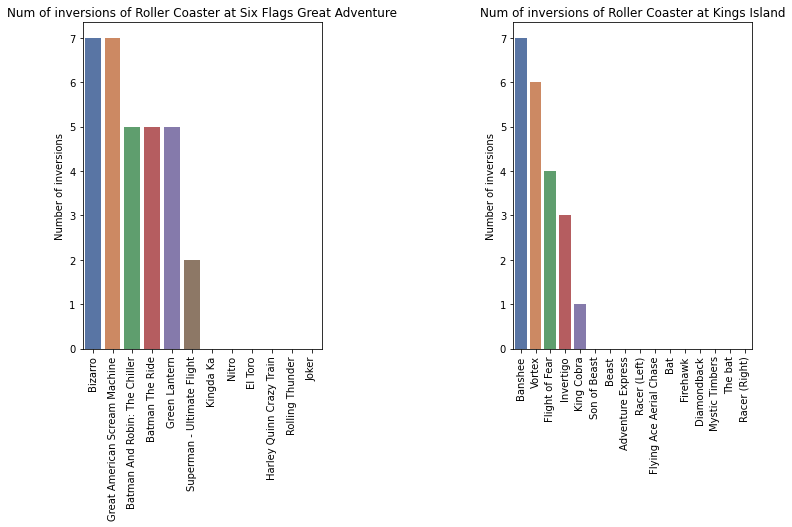

In [268]:
# 7
# Create a function to plot inversions by coaster at park
def plot_bar(df, park, ax):
    park_df = df[df['park'] == park].sort_values("num_inversions", ascending=False)
    sns.barplot(x = park_df.name, y = park_df.num_inversions, palette='deep', ax=ax)
    ax.set_title('Num of inversions of Roller Coaster at '+ park)
    ax.set_xlabel('')
    ax.set_ylabel('Number of inversions')
    ax.set_xticks(range(len(park_df)))
    ax.set_xticklabels(park_df['name'], rotation = 90)
    
# Create barplot of inversions by roller coasters
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
plt.subplots_adjust(wspace = 0.8)
plot_bar(df, 'Six Flags Great Adventure', axs[0])
plot_bar(df, 'Kings Island', axs[1])
plt.show()

In [ ]:
# 8
# Create a function to plot a pie chart of status.operating
def plot_pie(df, park, ax):
    ax.pie(,labels = , autopct = '')
# Create pie chart of roller coasters

In [ ]:
# 9
# Create a function to plot scatter of any two columns

# Create a function to plot scatter of speed vs height

# Create a scatter plot of roller coaster height by speed